<a href="https://colab.research.google.com/github/jofuture/project/blob/main/AI_02_%EC%A1%B0%EB%AF%B8%EB%9E%98_Section4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **표정이미지 분류하기**

      
      
      프로젝트 목표 : 한국인 안면 이미지 데이터를 활용해 표정을 분류해내는 모델을 구축해보자
      가설 :서양인의 안면 데이터를 넣었을때 과연 유사도를 잘 찾아내고 또 분류해낼수 있을까?

## **데이터 불러오기 및 전처리**

데이터 출처 

AI HUB ( 한국인 안면 이미지 ) - https://aihub.or.kr/aidata/73

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from skimage.io import imread_collection

X_anger = imread_collection('/content/gdrive/MyDrive/dataset/fake_data/anger/*.jpg')
X_panic = imread_collection('/content/gdrive/MyDrive/dataset/fake_data/panic/*.jpg')
X_joy = imread_collection('/content/gdrive/MyDrive/dataset/fake_data/joy/*.jpg')
X_neut = imread_collection('/content/gdrive/MyDrive/dataset/fake_data/neutrality/*.jpg')
X_sadness = imread_collection('/content/gdrive/MyDrive/dataset/fake_data/sadness/*.jpg')
X_wound = imread_collection('/content/gdrive/MyDrive/dataset/fake_data/wound/*.jpg')
X_anxiety = imread_collection('/content/gdrive/MyDrive/dataset/fake_data/anxiety/*.jpg')


# 데이터는 표정에 따라 7개의 클래스로 나뉘어져있습니다.
# 원본데이터는 클래스당 500개 총 4200개 이미지로 구성되어 있지만 이미지 로딩에 어려움이 있어 각 클래스당 50개씩 총 350개의 이미지를 사용하였음

In [ ]:
# image resize

from skimage.transform import resize
X = []
y = []
for i in range(len(X_anger)):
  X.append(resize(X_anger[i], (224, 224)))
  y.append(0)
for i in range(len(X_panic)):
  X.append(resize(X_panic[i], (224, 224)))
  y.append(1)
for i in range(len(X_joy)):
  X.append(resize(X_joy[i], (224, 224)))
  y.append(2)
for i in range(len(X_neut)):
  X.append(resize(X_neut[i], (224, 224)))
  y.append(3)
for i in range(len(X_sadness)):
  X.append(resize(X_sadness[i], (224, 224)))
  y.append(4)
for i in range(len(X_wound)):
  X.append(resize(X_wound[i], (224, 224)))
  y.append(5)
for i in range(len(X_anxiety)):
  X.append(resize(X_anxiety[i], (224, 224)))
  y.append(6)

In [ ]:
import numpy as np
X = np.array(X)
y = np.array(y)

# RAW 데이터지만 비교적 잘 정제가 되어있는 상태라 간단히 리사이즈만 시켜주었음
# 모델에 넣기전 행렬로 변환해주었음

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
X_train = np.asarray(X_train, np.float32)
X_val = np.asarray(X_test, np.float32)
y_train = np.asarray(y_train, np.float32)
y_val = np.asarray(y_test, np.float32)

## **모델 생성 - CNN**

In [ ]:

# 데이터가 적음으로 발생하는 과적합을 방지하고자 초기 신경망은 적게 설정해주었으나 학습률이 15% 즉 7개 클래스중 1개를 찍은 것과같은 결과가 나와 학습이 전혀 되지 않음을 확인.
# 해결방안을 찾지못하였고  학습이 되는지를 우선적으로 확인하고자 모델망을 깊게 쌓아올려 과적합을 유도. 또한 층마다 dropout, batchNormalization을 해주었음
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,AveragePooling2D,Dropout,BatchNormalization
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import keras.losses
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

num_class = 7
batch_size = 32

model = Sequential()
model.add(Rescaling(1./255, input_shape=(224, 224, 3))),

model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(num_class, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 224, 224, 64)      4864      
_________________________________________________________________
dropout_2 (Dropout)          (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 224, 224, 64)      102464    
_________________________________________________________________
batch_normalization_6 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 112, 112, 128)    

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', # 클래스 라벨을 정수로 설정
              optimizer='adam',
              metrics=['accuracy']) #평가지표

## **모델 학습**

In [ ]:
checkpoint_filepath = '/content/gdrive/MyDrive/dataset/fake_data/tmp/checkpoint'
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath,             # file명을 지정합니다
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다
                             verbose=1,            # 로그를 출력합니다
                             save_best_only=True,  # 가장 best 값만 저장합니다
                             mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )
earlystopping = EarlyStopping(monitor='loss', patience=3)
# save best/ callback.modelcheckpoint
history = model.fit(
    X_train,
    y_train,
    validation_data = (X_val, y_val),
    batch_size=batch_size,
    callbacks=[checkpoint, earlystopping],
    epochs=100)


Epoch 1/100
8/8 [==============================] - 1s 137ms/step - loss: 4.7890 - accuracy: 0.7167 - val_loss: 77.5071 - val_accuracy: 0.1552

Epoch 00001: val_loss improved from inf to 77.50711, saving model to /content/gdrive/MyDrive/dataset/fake_data/tmp/checkpoint
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/dataset/fake_data/tmp/checkpoint/assets
Epoch 2/100
8/8 [==============================] - 1s 133ms/step - loss: 3.7718 - accuracy: 0.7811 - val_loss: 87.6863 - val_accuracy: 0.1552

Epoch 00002: val_loss did not improve from 77.50711
Epoch 3/100
8/8 [==============================] - 1s 133ms/step - loss: 4.0119 - accuracy: 0.7382 - val_loss: 76.0817 - val_accuracy: 0.1552

Epoch 00003: val_loss improved from 77.50711 to 76.08168, saving model to /content/gdrive/MyDrive/dataset/fake_data/tmp/checkpoint
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/dataset/fake_data/tmp/checkpoint/assets
Epoch 4/100
8/8 [==============================] - 1s 133ms/step

In [ ]:
# 의도한대로 과적합은 시켯으나 원론적인 문제는 해결하지 못함

In [ ]:
X_test_collection = imread_collection('/content/gdrive/MyDrive/dataset/test_data/*.jpg')
X_result = []
y_result = [2, 2, 1, 2, 0, 6, 5, 4, 3]
y_dict = {0:"anger", 1:"panic", 2:"joy", 3:"neut", 4:"sadness", 5:"wound", 6:"anxiety"}
for i in range(len(X_test_collection)):
  X_result.append(X_test_collection[i])

X_test = []
y_test = [2, 2, 1, 2, 0, 6, 5, 4, 3]
for i in range(len(X_test_collection)):
  X_test.append(resize(X_test_collection[i], (224, 224)))

X_test = np.array(X_test)
y_test = np.array(y_test)

X_test = np.asarray(X_test, np.float32)
y_test = np.asarray(y_test, np.float32)

In [ ]:
print(X_test[0].shape)

(224, 224, 3)


## **학습 결과**

In [ ]:
for i in range(len(X_test)):
  predictions = model.predict(X_test[:])
  score = tf.nn.softmax(predictions[0])
  print(score)

 # 원본데이터중 9개의 데이터를 임의로 넣어 테스트를 진행한 결과 모든 예측값이 같은것을 확인. 예상할 수 있는 결과.
  # 테스트 결과 모든 예측값이 같음

tf.Tensor(
[0.31179097 0.1147015  0.1147015  0.1147015  0.1147015  0.1147015
 0.1147015 ], shape=(7,), dtype=float32)
tf.Tensor(
[0.31179097 0.1147015  0.1147015  0.1147015  0.1147015  0.1147015
 0.1147015 ], shape=(7,), dtype=float32)
tf.Tensor(
[0.31179097 0.1147015  0.1147015  0.1147015  0.1147015  0.1147015
 0.1147015 ], shape=(7,), dtype=float32)
tf.Tensor(
[0.31179097 0.1147015  0.1147015  0.1147015  0.1147015  0.1147015
 0.1147015 ], shape=(7,), dtype=float32)
tf.Tensor(
[0.31179097 0.1147015  0.1147015  0.1147015  0.1147015  0.1147015
 0.1147015 ], shape=(7,), dtype=float32)
tf.Tensor(
[0.31179097 0.1147015  0.1147015  0.1147015  0.1147015  0.1147015
 0.1147015 ], shape=(7,), dtype=float32)
tf.Tensor(
[0.31179097 0.1147015  0.1147015  0.1147015  0.1147015  0.1147015
 0.1147015 ], shape=(7,), dtype=float32)
tf.Tensor(
[0.31179097 0.1147015  0.1147015  0.1147015  0.1147015  0.1147015
 0.1147015 ], shape=(7,), dtype=float32)
tf.Tensor(
[0.31179097 0.1147015  0.1147015  0.1147015  

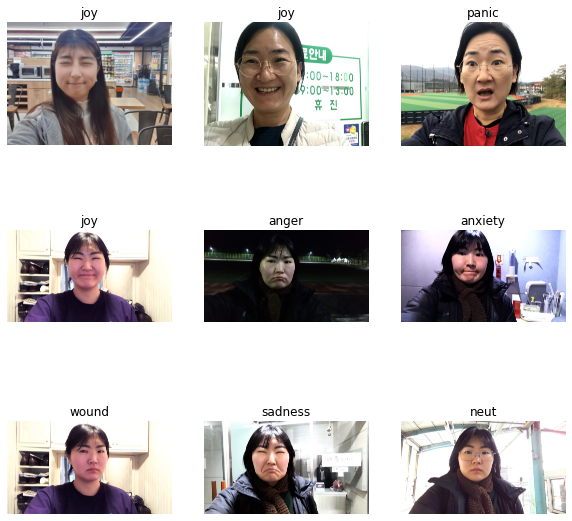

In [ ]:
import matplotlib.pyplot as plt
import PIL.Image

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(X_result[i].astype("uint8"))
  # PIL.Image.open(X_test[i])
  plt.title(y_dict[y_result[i]])
  plt.axis("off")



**1.데이터에 대한 이해 부족** 

**2.미흡한 전처리** 배경 노이즈 제거

**3.기술구현의 어려움** 

